# 94-775/95-865: More on Topic Modeling and Clustering
**Author:** Erick Rodriguez (erickger [at symbol] cmu.edu)

This demo covers clustering techniques on handwritten digits. We will look into K-means and GMM. We will also use dimensionality reduction with t-SNE and classification over the 2-dimensional data.

In the second part, we explore topic modeling in Natural Language Processing. Our example looks into finding insights from the speakers' discourses in the presidential debate. In order to find correlations, we look into the named entities extracted from the different fragments of text (the group of sentences from each candidate's participation).

# Part 1 - Clustering on Images, and a Sketch of How to Make Sense of the Clusters

In this part, we revisit the MNIST handwritten digits example that we saw earlier in the course with t-SNE. We will look be looking at clustering techniques as well some visualizations to make sense of the clusters.

We import the necessary elements plot our clusters as well as numpy for array manipulation. We also create some difinitions for our libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
np.set_printoptions(formatter=None)  # This piece of code resets the print format for numpy to default
plt.style.use('seaborn') # Matplotlib will print in seaborn style (http://seaborn.pydata.org/tutorial/aesthetics.html)

In [2]:
# Aligns our plots to the center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [6]:
%%capture
# -------------------------------------------------------------------------------------------------------------
# "capture" avoids printing the ouput of the cell. This cell will print the downloading results of the dataset. 
# If something is not working we can remove "capture" to see the output
# -------------------------------------------------------------------------------------------------------------
import torch
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
images = np.array([image.numpy() for image, label in train_dataset]) # The images and labels are stored as numpys

### Exploring the dataset
The dataset has 6000 images. Each image has 28 by 28 pixels, which together can be visulized in the form of a handwritten number. We will start by reshaping the numpy matrix we have to a flatten numpy array. That meeans before we had 28 by 28 pixels. Now we will have a flat array with 784 elements in it (28x28).

In [14]:
print("Dimentions before :", images.shape)
num_images = images.shape[0] # total number of images
feature_vectors = images.reshape(num_images, -1) # reshaping to a flat array
print("Dimentions after  :", feature_vectors.shape)

Dimentions before : (60000, 1, 28, 28)
Dimentions after  : (60000, 784)


From this dataset we also obtain the labels. That we get the actual number that correspond to each of the handwritten numbers (each of the rows/images within the dataset)

In [6]:
labels = np.array([label for image, label in train_dataset]) # obtain ing labels
print("The labels are:", np.unique(labels)) # looking at all the possible results (digits 0 to 9)

The labels are: [0 1 2 3 4 5 6 7 8 9]


### Sampling and exploring
We will be working with a **sub-sample** of data to make the experiment faster. We will be looking at 5000 sample rows chosen **ramdomly**

In [7]:
np.random.seed(0) # seed makes random numbers to remain constant every time we run the "random" method of numpy
random_sample = np.random.permutation(num_images)[:5000]  # we pick 5000 random indices

<font color='#FF7659'>**How can we look at this images from the numpy arrays?**</font> the method "imshow" from pyplot allows us to print the actual images

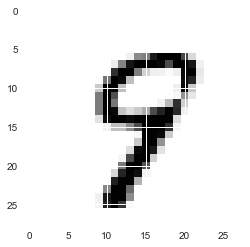

In [11]:
# inline will make your plot outputs appear and be stored within the notebook
%matplotlib inline
# we need to reshape again before we use imshow
plt.imshow(feature_vectors[np.random.randint(num_images)].reshape(28, 28)) 
plt.show()

### Clustering in the original space with k-means

Let's first cluster in the original high-dimensional space with k-means. We first import the library from sklearn.

In [9]:
from sklearn.cluster import KMeans

We only need the handwritten numbers (pixels) to start our clustering exercise. We will save our sample data on the variable **X**. The next step is to train the algorithm and fit the model to the data. n_cluster is then most important parameter and tells us how many clusters will be created fromk the data. Because we know we have 10 numbers, we will need the data to be divided in 10 parts; each part corresponding to a digit (0-9)

In [68]:
X = feature_vectors[random_sample]

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

After fitting our k-means model we can start looking at the cluster centers. The result of looking at the cluster_centers_ is a matrix that contains de coordinates of cluster centers. We have a matrix of 10 rows by 784 columns. Each row has 784 values that corresponds to a coordinate in the 784-space

In [69]:
print("The dimensions:", kmeans.cluster_centers_.shape)
print("\nThe matrix")
print(kmeans.cluster_centers_)

The dimensions: (10, 784)

The matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


To get the cluster assignments we call the method "predict". This means that each handwritten number (row) will be assigned to a certain cluster (there are 10 cluster based on our n_cluster)

In [70]:
kmeans_cluster_assignments = kmeans.predict(X)

In [84]:
print("For instance, this are the cluster assignments for the first 10 rows:", kmeans_cluster_assignments[:10])
print("There are {0} clusters corresponding to ".format(len(np.unique(kmeans_cluster_assignments))), 
      np.unique(kmeans_cluster_assignments))

For instance, this are the cluster assignments for the first 10 rows: [0 4 9 4 1 2 4 9 3 4]
There are 10 clusters corresponding to  [0 1 2 3 4 5 6 7 8 9]


<font color='#FF7659'>**How do we figure out which points are in cluster 0?**</font>

In [86]:
X[kmeans_cluster_assignments == 0]

# ---------------------------------------------------------------------------------------------------
# kmeans_cluster_assignments == 0 gives us all the indices where the assignment is 0
# then the indices are used wityh our original dataset to see all the numbers that were assigned to 0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<font color='#FF7659'>**Does cluster 0 actually correspond to digit 0?**</font>

Hopefully it makes sense that the answer is, in general, **no**. K-means does not actually use the labels during the model fitting procedure. As such, it does not know what "digit 0" means. Moreover, the ordering of clusters that it determines is in an arbitrary order.

Let's find out what cluster 0 actually corresponds to in this particular case. For instance, we can plot what the average image is across images in cluster 0.

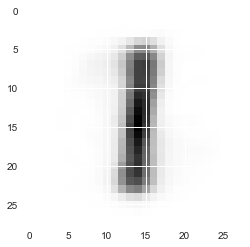

In [87]:
plt.imshow(X[kmeans_cluster_assignments == 0].mean(axis=0).reshape(28, 28))
plt.show()

Another thing we can do is to plot the cluster center estimated by k-means for cluster 0. This will tell us what handwrittendigit has being assigned to be the center point in the particular cluster

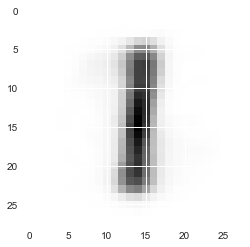

In [90]:
plt.imshow(kmeans.cluster_centers_[0].reshape(28, 28))
plt.show()

### Cluster centers
Let's now visualize all the **cluster centers**. We can then observe is we have all digits from 0 to 9 as centers or if there are centers that might have been confused with other numbers

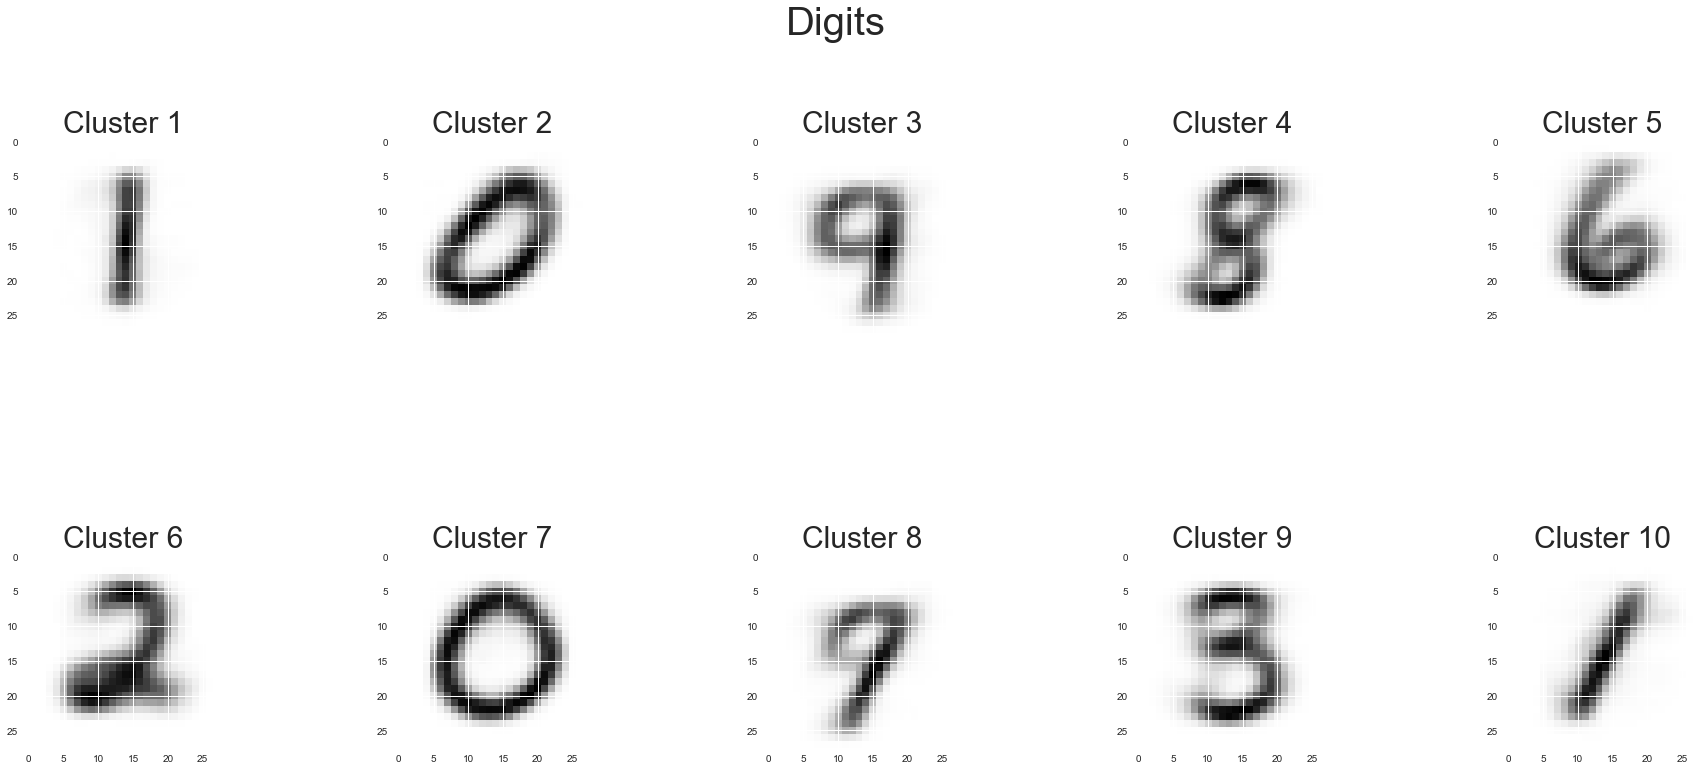

In [89]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for cluster_idx in range(10):
    ax = axes[cluster_idx]
    ax.imshow(kmeans.cluster_centers_[cluster_idx].reshape(28, 28))
    ax.set_title(f"Cluster {cluster_idx +1}", fontdict={"fontsize": 30})
    fig.suptitle("Digits", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

It's immediately clear that k-means wasn't able to get all 10 digits as their own clusters!

**Another visualization strategy:** we can figure out which images are closest to a cluster center.

Let's look at the top 20 images closest to cluster 7. First, we calculated the distances of the points to the center. In this case, we look at the center of cluster 8 (index 7)

In [122]:
distances = np.array([np.linalg.norm(point - kmeans.cluster_centers_[7]) for point in X])
sorted_indices = np.argsort(distances)[:20]

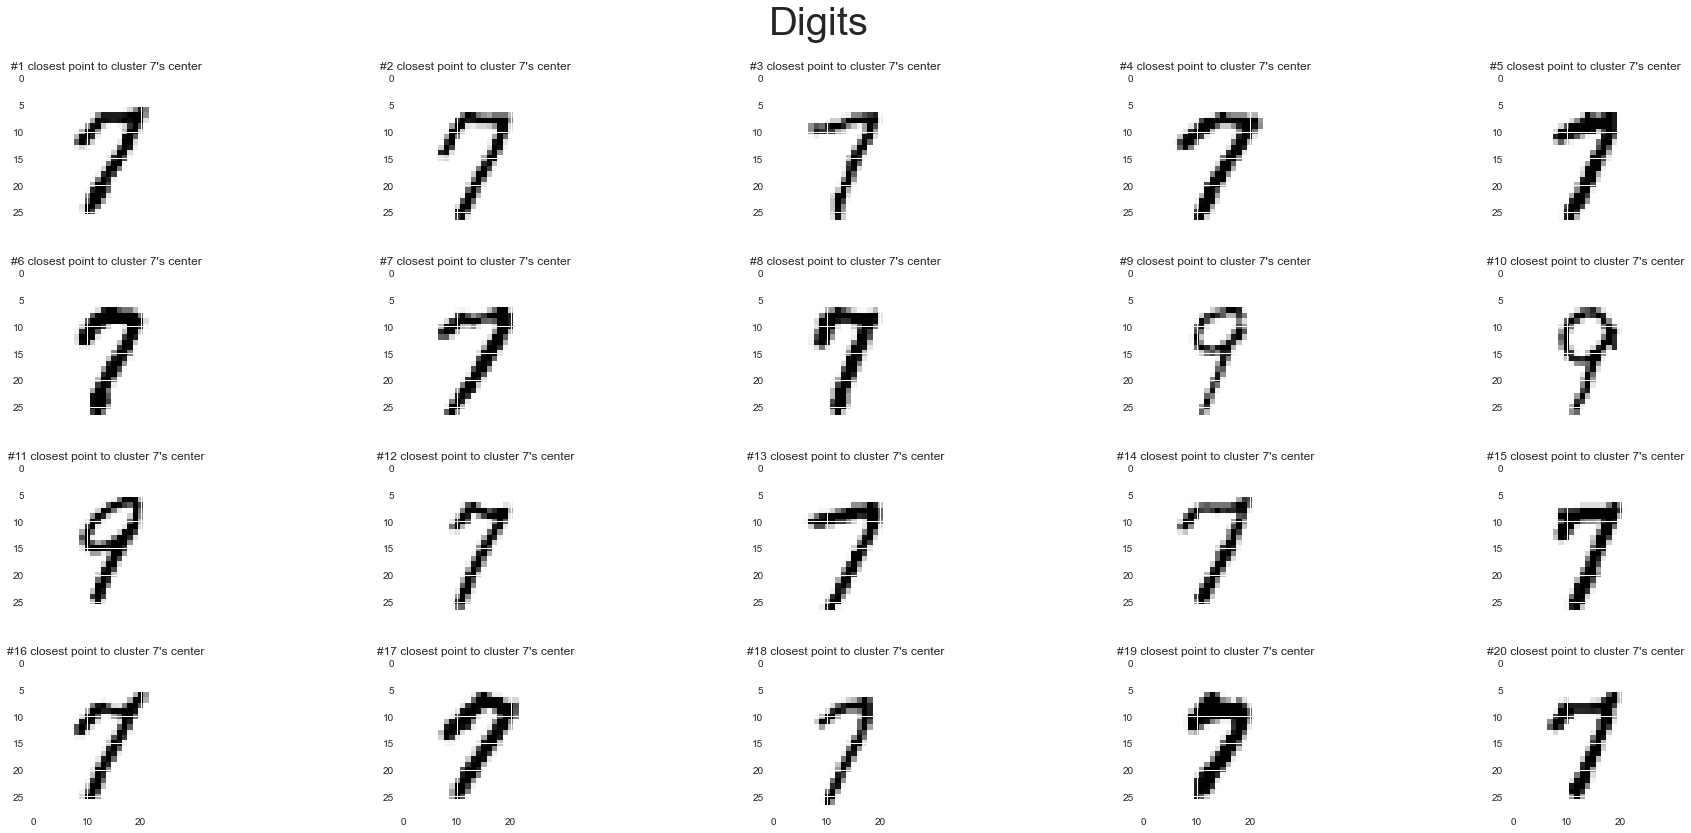

In [123]:
fig, axes = plt.subplots(4, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for idx, (dist, point) in enumerate(zip(distances[sorted_indices], X[sorted_indices])):
    ax = axes[idx]
    ax.imshow(point.reshape(28, 28))
    ax.set_title("#%d closest point to cluster 7's center" % (idx + 1))
    fig.suptitle("Digits", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

From the average image of cluster 7 earlier, it's clear that there's a confusion between 7's and 9's. Here's another visualization: we can compute the standard deviation across individual pixels, just for images in cluster 7.

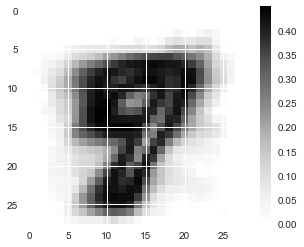

In [91]:
plt.imshow(X[kmeans_cluster_assignments == 7].std(axis=0).reshape(28, 28))
plt.colorbar()
plt.show()

We can see above which pixels appear to have the most variability.

### Clustering in the original space with GMMs

Now, let's try GMM's. We start by clustering in the original space. As a word of caution, this will take some time to run since the original space is quite high-dimensional. We start by importing the GaussianMixture model form sklearn and as before we will call fit and predict to produce our final results.

In [92]:
from sklearn.mixture import GaussianMixture

start_time = time.time() # This line helps us to set the start time when the model starts to fit the data
gmm = GaussianMixture(n_components=10, n_init=10, random_state=0)
gmm.fit(X) # Fitting the algorithm withe the original data
end_time = time.time()
print("execution time: ", end_time - start_time) # This line computes the final time
gmm_cluster_assignments = gmm.predict(X) # Predicting the clusters

execution time:  112.40421772003174


Just as with k-means, we can visualize cluster means:

In [93]:
print(gmm.means_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Here, we plot the learned cluster means (the $\mu_i$'s) and also standard deviations per pixel (technical detail: these come from taking the diagonal entries of the covariance matrices $\Sigma_i$'s and then taking square root since the diagonal entries actually store variances and not standard deviations).

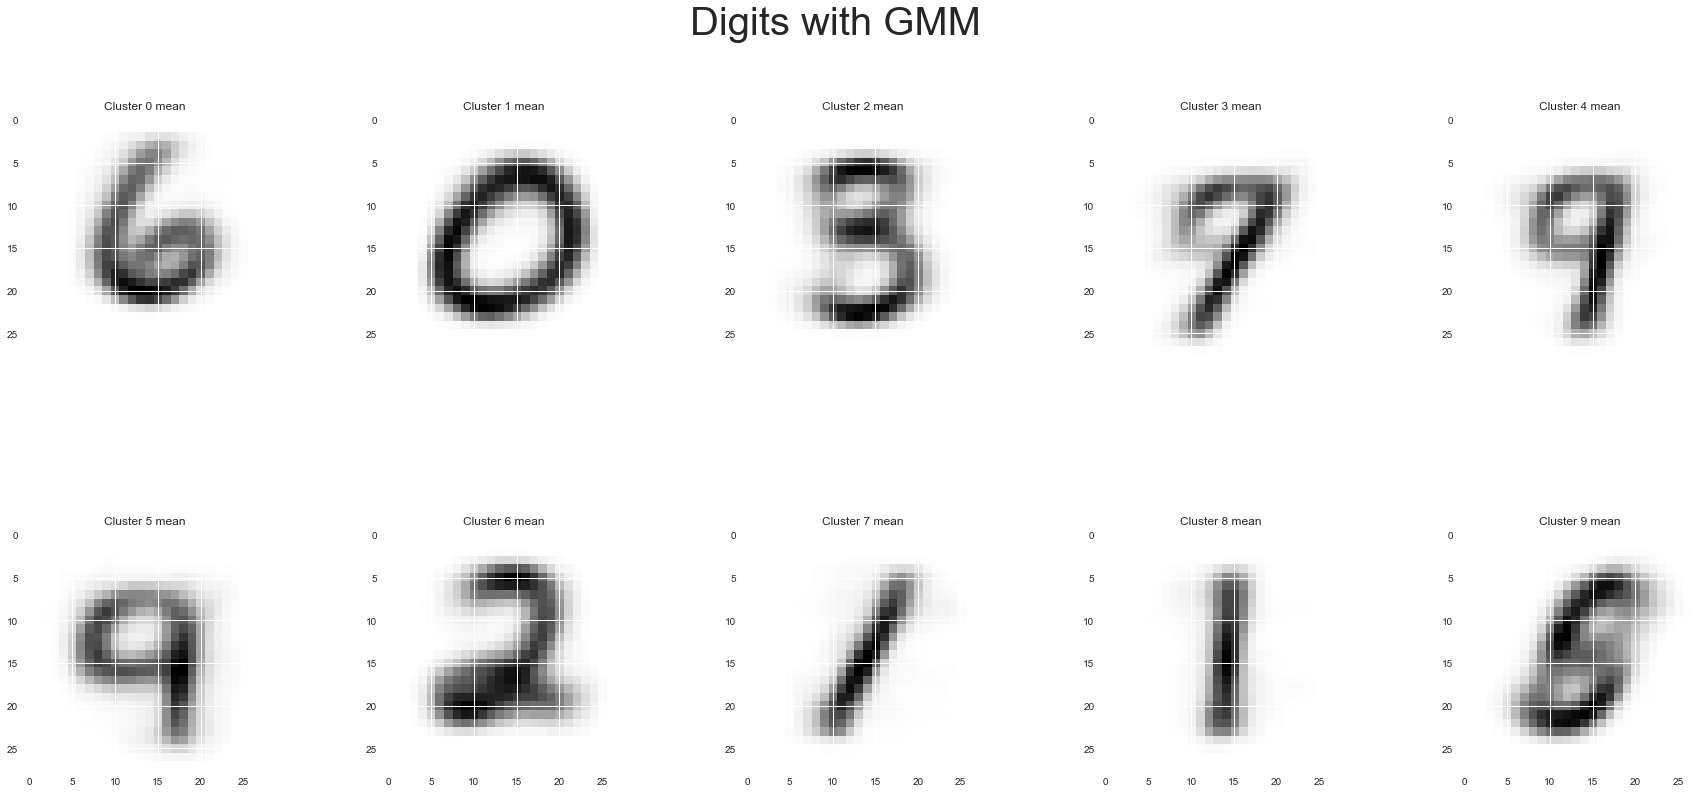

In [94]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for cluster_idx in range(10):
    ax = axes[cluster_idx]
    ax.imshow(gmm.means_[cluster_idx].reshape(28, 28))
    ax.set_title('Cluster %d mean' % cluster_idx)
    fig.suptitle("Digits with GMM", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

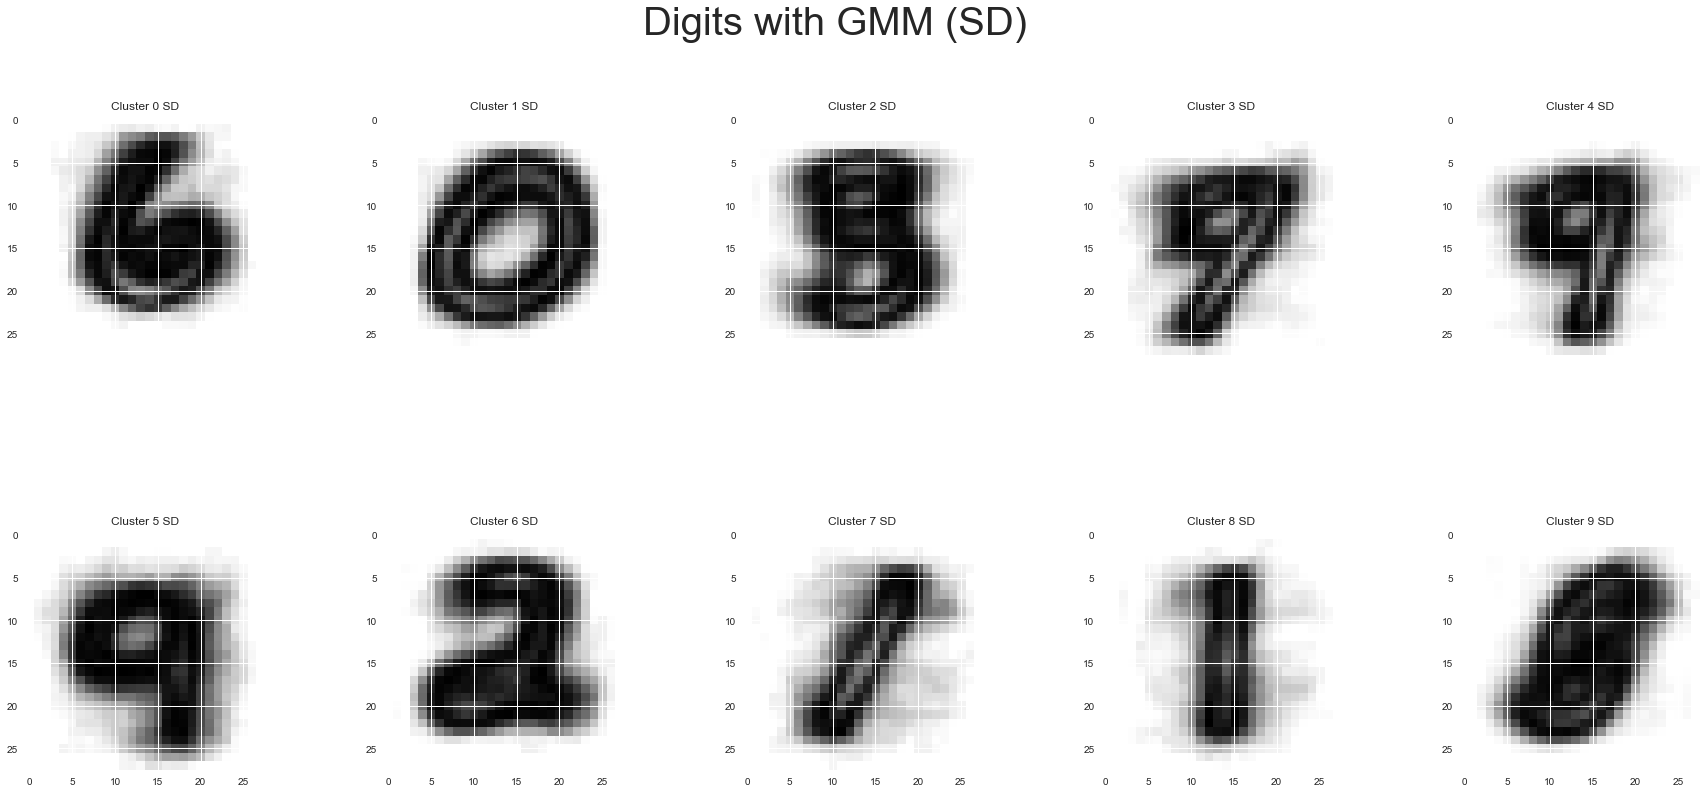

In [95]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for cluster_idx in range(10):
    ax = axes[cluster_idx]
    ax.imshow(np.sqrt(np.diag(gmm.covariances_[cluster_idx])).reshape(28, 28))
    ax.set_title('Cluster %d SD' % cluster_idx)
    fig.suptitle("Digits with GMM (SD)", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

Just as with k-means, we can also find which of the images in the dataset are closest to a cluster center, but now we should account for shape and not use raw Euclidean distances! How do we do this? The important basic idea here is that we work with probabilities. The probabilities serve as the similarity scores!

In [96]:
probabilities_points_being_to_different_clusters = gmm.predict_proba(X)

For example, we can look at which cluster has the **highest probability** for the handwritten number corresponding to row 493

In [113]:
print("Probabilities for row 49:\n\n", probabilities_points_being_to_different_clusters[492])

Probabilities for row 49:

 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 6.48930974e-229
 1.00000000e+000 0.00000000e+000]


Finally, for instance, we can look at the top 20 points (rows/digits) with the highest probability of belonging to cluster 0

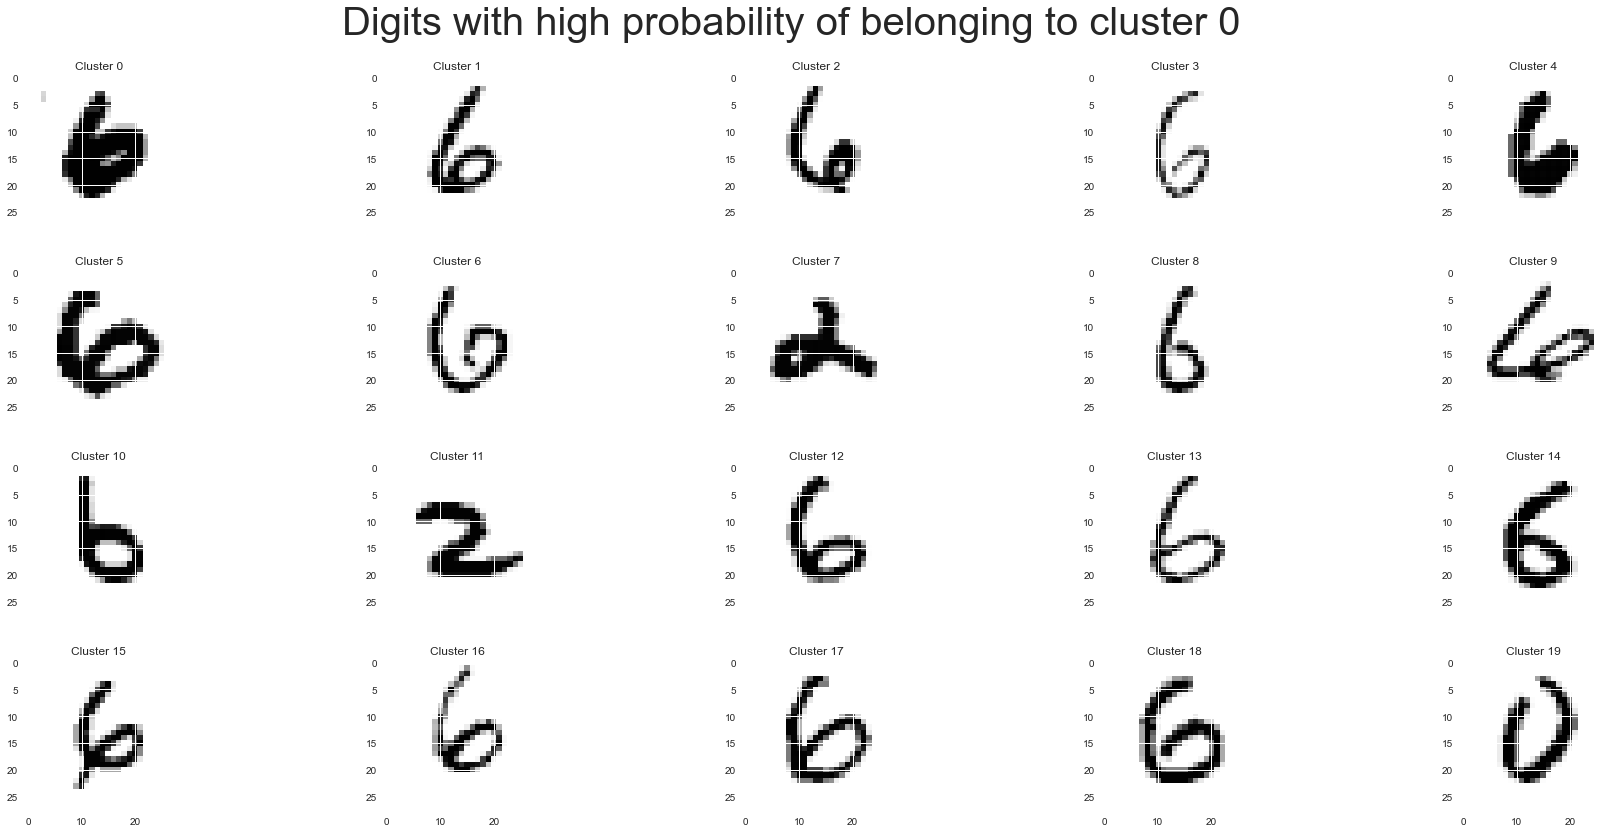

In [125]:
sorted_indices = np.argsort(-probabilities_points_being_to_different_clusters[:, 0])[:20]

fig, axes = plt.subplots(4, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for idx, (dist, point) in enumerate(zip(distances[sorted_indices], X[sorted_indices])):
    ax = axes[idx]
    ax.imshow(point.reshape(28, 28))
    ax.set_title('Cluster %d ' % idx)
    fig.suptitle("Digits with high probability of belonging to cluster 0", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

### Clustering in a 2D T-SNE space with k-means

We can repeat what we did above but now apply clustering in a 2D t-SNE space. Keep in mind that t-SNE space is *not* unique in that depending on the hyper-parameters we run, it will change, including randomness. Thus, there are many possible 2D t-SNE spaces...

We will just stick to using one of them. 

First, we start importing the model and the applying the classical fit_transform to get our results

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=0)
feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.706s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.321664
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.636673
[t-SNE] KL divergence after 1000 iterations: 1.479672


If we plot this result we will see all the data in a 2-dimensional space

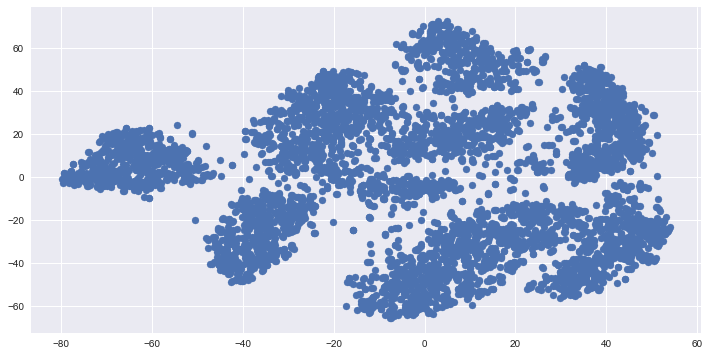

In [133]:
plt.figure(figsize=(12, 6))
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1])
plt.show()

However, we can also give colors based on the labels that we got from our original dataset. This will show us how the different handwritten digits are distributed in our 2d space

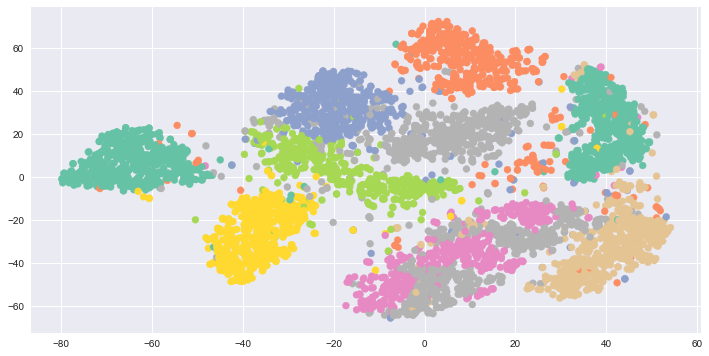

In [136]:
plt.figure(figsize=(12, 6))
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1],
            c=labels[random_sample], cmap='Set2')
plt.show()

We can observe in this plot that some clear clusters are forming; however, for other digits, the clusters seem to be entangled/mixed, making it difficult to separate them. This problem will also occur when the model tries to distinguish one handwritten digit from another.

Let's now try to run our k-means algorithm as before, but know with the 2d data

In [137]:
new_kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
new_kmeans.fit(feature_vectors_tsne2d)

KMeans(n_clusters=10, random_state=0)

Unlike when we worked in the original space, the cluster means in 2D are now just 2D points. **In particular, the cluster means in 2D t-SNE space are no longer images that we can readily visualize, but just pairs of numbers.**

In [139]:
new_kmeans.cluster_centers_

array([[ -0.77532744, -50.104446  ],
       [ 33.20213   ,  33.30186   ],
       [ -1.8330756 ,   7.493784  ],
       [ 15.085539  , -26.490023  ],
       [  8.037954  ,  54.72433   ],
       [-63.774296  ,   6.232571  ],
       [ 39.50086   , -32.76941   ],
       [-36.0578    , -25.660137  ],
       [ 38.542107  ,   8.014344  ],
       [-22.14669   ,  26.542063  ]], dtype=float32)

Let's look at the predictions now. We can compare our result to the original data by comparing the image generated after k-means has been applied

In [141]:
new_kmeans_cluster_assignments = new_kmeans.predict(feature_vectors_tsne2d)

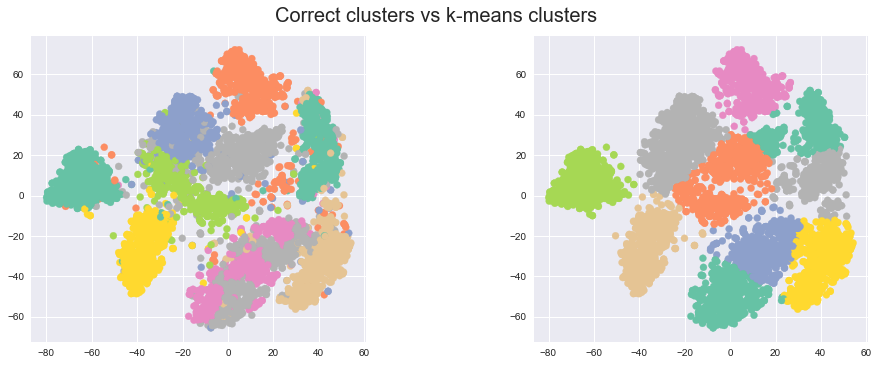

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
axes = axes.flatten() 
axes[0].scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=labels[random_sample], cmap='Set2')
axes[1].scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=new_kmeans_cluster_assignments, cmap='Set2')
fig.suptitle("Correct clusters vs k-means clusters\n\n", fontsize=20)
plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

Similar to what we did in lecture with t-SNE and the drug consumption data, the idea is to visualize things in the original space, but use cluster assignments from the 2D t-SNE space we found.

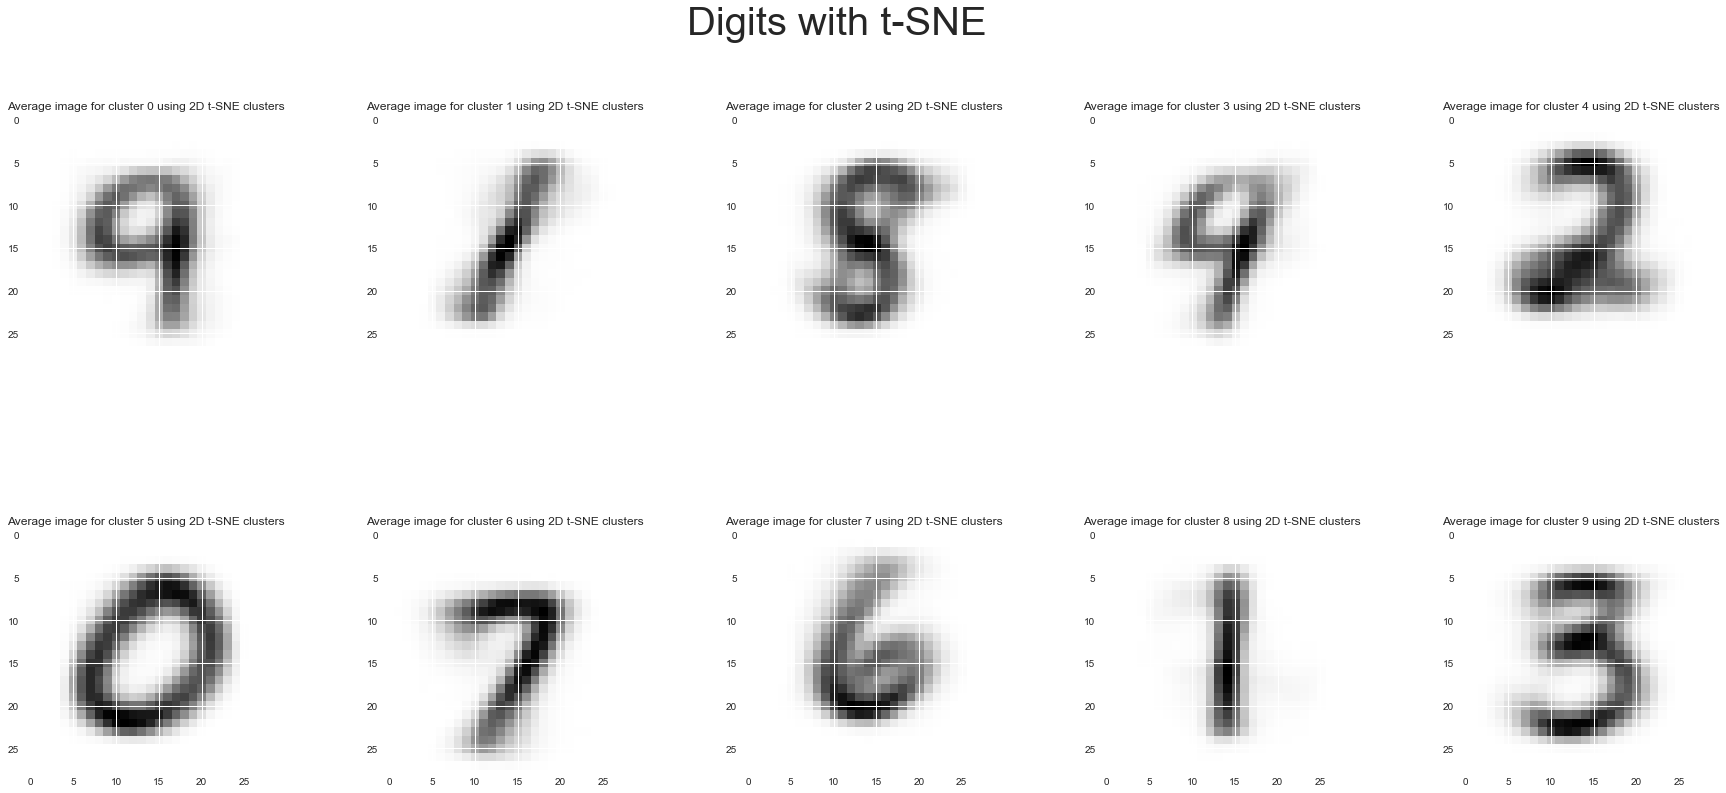

In [495]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()

for cluster_idx in range(10):
    ax = axes[cluster_idx]
    ax.imshow(X[new_kmeans_cluster_assignments == cluster_idx].mean(axis=0).reshape(28, 28))
    ax.set_title('Average image for cluster %d using 2D t-SNE clusters' % cluster_idx)
    fig.suptitle("Digits with t-SNE", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

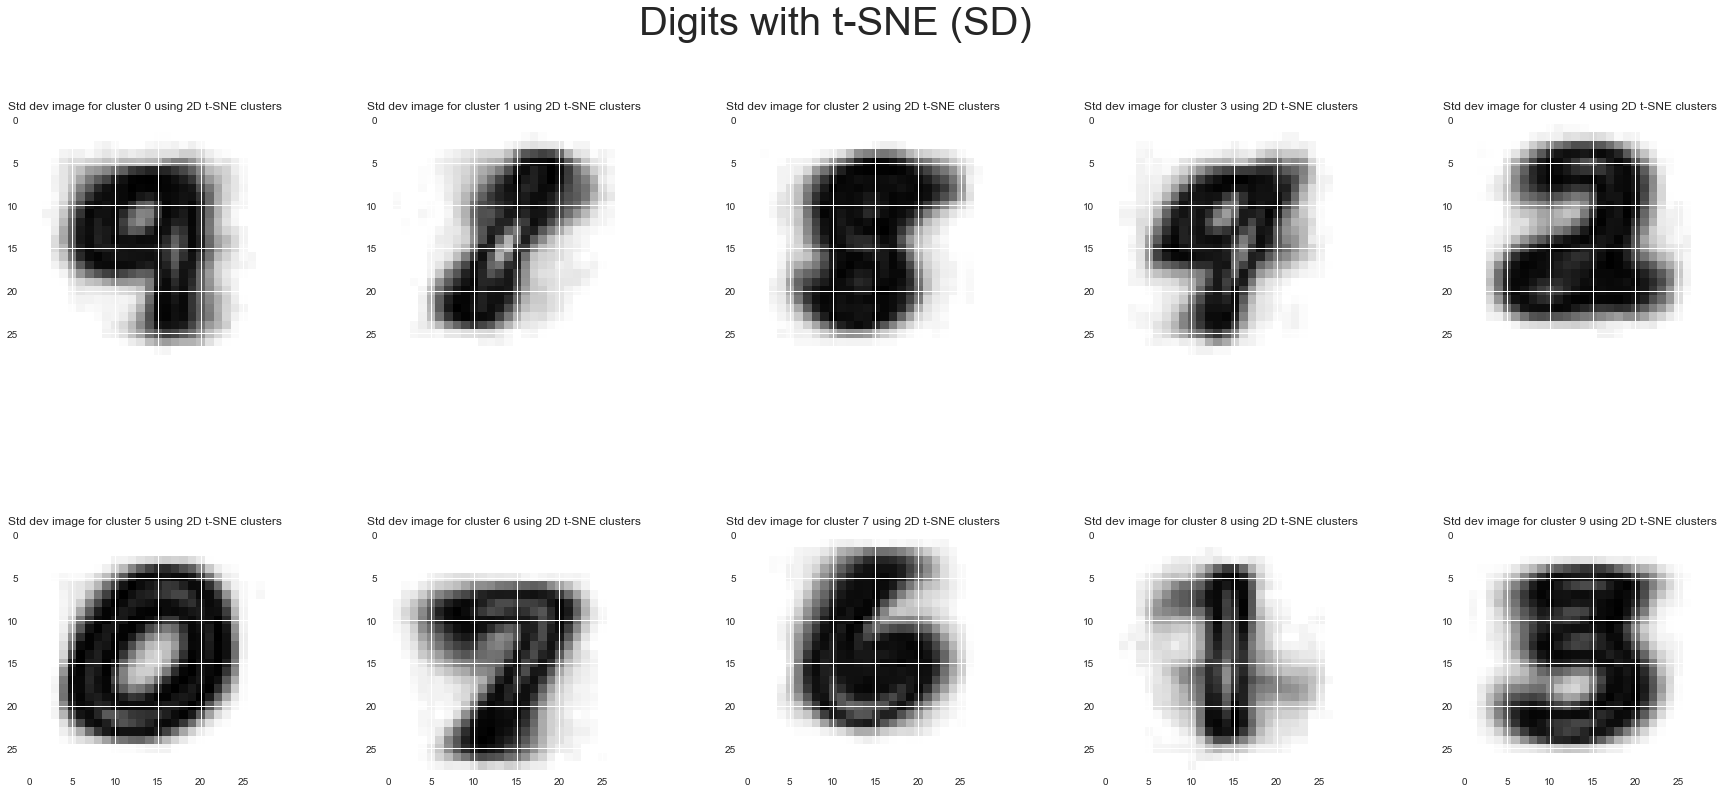

In [496]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()

for cluster_idx in range(10):
    ax = axes[cluster_idx]
    ax.imshow(X[new_kmeans_cluster_assignments == cluster_idx].std(axis=0).reshape(28, 28))
    ax.set_title('Std dev image for cluster %d using 2D t-SNE clusters' % cluster_idx)
    fig.suptitle("Digits with t-SNE (SD)", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

We can again figure out what images are considered closest to a particular cluster (such as cluster 3) but this time using the distance in the t-SNE space.

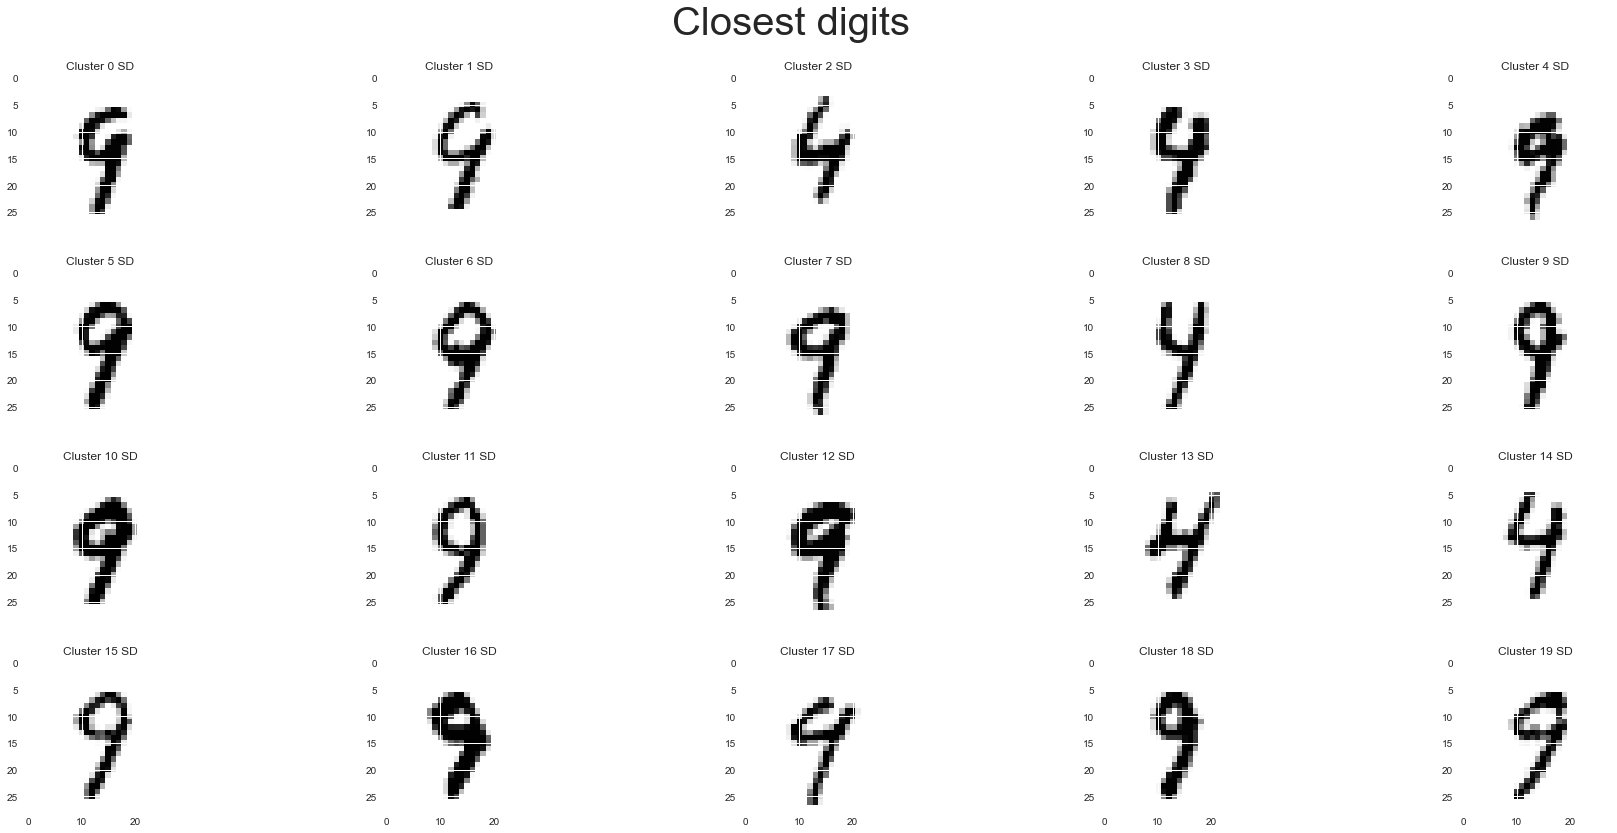

In [553]:
distances = np.array([np.linalg.norm(point - new_kmeans.cluster_centers_[3]) for point in feature_vectors_tsne2d])
sorted_indices = np.argsort(distances)[:20]

fig, axes = plt.subplots(4, 5, figsize=(30, 12), sharex=True)
axes = axes.flatten()
for idx, (dist, point) in enumerate(zip(distances[sorted_indices], X[sorted_indices])):
    ax = axes[idx]
    ax.imshow(point.reshape(28, 28))
    ax.set_title('Cluster %d SD' % idx)
    fig.suptitle("Closest digits", fontsize=40)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

#  **Part 2 - Working with Presidential Debate Data for Topic Modeling**


In this part we will examine the debates for presidential elections in the United States of America. We are **Obtaining** the data and **examining** the dataset in the first blocks of code. With respect to the dataset, we will be working with only three columns with names: Speaker, Text and Date. Our main focus for this demo is the **text**.

Let's start importing all the packages we need

In [252]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import sklearn
import spacy
from IPython.display import display, HTML
from time import time

Let's import the dataset and look at the first row. Just to get a tatest of what we can find in the data

In [253]:
debates_csv = pd.read_csv("primary_debates_cleaned.csv", usecols=['Speaker', 'Text', 'Date'])

In [254]:
display(HTML(debates_csv.head(1).to_html(index = False))) # display and HTML make the dataframe printing prettier

Speaker,Text,Date
Woodruff,"Good evening, and thank you. We are happy to welcome you to Milwaukee for this Democratic debate. We are especially pleased to thank our partners at Facebook, who have helped us set up a vibrant conversation among voters who are undecided. And tonight you're going to hear some of their questions for the candidates. And you can follow along at home on the PBS NewsHour page on Facebook. We also want to thank our hosts, the University of Wisconsin, Milwaukee, on whose campus we meet, here in the beautiful Helen Bader Concert Hall.",2/11/16


It's is important that we clean the dataset. We are doing few changes in this case, but ideally we would want to clean the dataset more to get better results. perhaps we will notice at the end that the results are a bit confusing. Most probably better pre-processing will allow for more accurate results.

In [255]:
# deleting all text that is just "applauses"
debates_csv = debates_csv[~debates_csv.Text.str.contains('\(APPLAUSE\)')] 

# deleting anything that is not a character or white space
debates_csv['Text'] = debates_csv['Text'].str.replace('[^\w\s]','', regex=True) 

# creating a date object for plotting purposes
debates_csv['Date'] = pd.to_datetime(debates_csv['Date']).dt.date

We would like to see any correlation with **"Organizations" (ORG) or "Nationalities or religious/political groups" (NORP)**. Thus we will do **named entity recognition** as we have seen in previous classes. As before we create the nlp object with spacy.load() and then we use nlp to do the NER task

In [256]:
nlp = spacy.load('en_core_web_sm', disable=['parser'])
parsed_text = [nlp(t) for t in debates_csv['Text'].to_list()]

In [257]:
def extract_entities(ent_type='', text=''):
    ent_list = []
    for text in parsed_text:
        temp = []
        for ent in text.ents:
            if ent.label_ == ent_type:
                temp.append(ent.text)
        ent_list.append(' '.join(set(temp)))
    return ent_list

Finally, we create two columns that will contain NORP and ORG entities

In [258]:
debates_csv['norp'] = extract_entities(ent_type='NORP', text=parsed_text)
debates_csv['org'] = extract_entities(ent_type='ORG', text=parsed_text)

We are interested on looking at the **organizations** that are mention during the speach of each candidate so we will keep all the entities that have an **ORG** label, which corresponds to the non-empty values in the org colum of our dataframe

In [259]:
debates_csv = debates_csv[debates_csv.org.str.strip() != ""]

Let's look again at what the dataset looks like

In [260]:
display(HTML(debates_csv.head(3).to_html(index = False)))

Speaker,Text,Date,norp,org
Woodruff,Good evening and thank you We are happy to welcome you to Milwaukee for this Democratic debate We are especially pleased to thank our partners at Facebook who have helped us set up a vibrant conversation among voters who are undecided And tonight youre going to hear some of their questions for the candidates And you can follow along at home on the PBS NewsHour page on Facebook We also want to thank our hosts the University of Wisconsin Milwaukee on whose campus we meet here in the beautiful Helen Bader Concert Hall,2016-02-11,Democratic,the University of Wisconsin Milwaukee PBS
Ifill,We want to also extend our warm thanks to Milwaukee Public Radio and Milwaukee Public Television as well as all of our friends at the PBS member stations across the country tuning in tonight This is the sixth time the Democrats have met face to face Each time we learn more about them and the presidents they say they want to be You know youre watching whether youre a Democrat a Republican or neither because you believe the outcome of the election is important to you And we believe that too With that lets welcome the candidates to the stage Senator Bernie Sanders of Vermont,2016-02-11,Democrat Democrats Republican,Milwaukee Public Television Milwaukee Public Radio PBS
Woodruff,Welcome Senator great to see you And former Secretary of State Hillary Clinton,2016-02-11,,State


In [261]:
# looking at the different named entities corresponding to NORP that appear in the dataset
print("We can see, for instance the different NORP entities found:\n")
print(set([y for x in [x.split() for x in debates_csv.norp.to_list()] for y in x][:20]))

We can see, for instance the different NORP entities found:

{'American', 'Democrat', 'Republican', 'AfricanAmericans', 'Democratic', 'Americans', 'Democrats', 'African'}


### Topic Modeling
We will be building a histogram of common words, which we will use later to reference the topics. In this case the usefulness of creating this histogram is that we can delte the top words. We infer that the top words are common words in this case; we we understand as stop words (e.g. this, that, for, etc.)

In [262]:
# We get the list of words from the text of each speaker participation
words = [word.lower() for speech in debates_csv['Text'] for word in speech.split()]

# We procced to create the histogram as shown in previous classes
from collections import Counter
histogram = Counter()
for word in words:
    histogram[word] += 1
sorted_pairs = sorted(histogram.items(), key=lambda x: x[1], reverse=True)
sorted_pairs = sorted_pairs[100:] #stop words 

# Finally we end up with a vocabulary of words 
# Keep in mind we don't need the histogram to create the vocabulary, but it helps because of the stop words
vocabulary = sorted([term for term, count in sorted_pairs])

In [263]:
print("Some words in the vocabulary are:", vocabulary[-100:-90])
print("The vocabulary length is", len(vocabulary))

Some words in the vocabulary are: ['wonderfully', 'wondering', 'wonkish', 'wont', 'woodrow', 'woods', 'woolly', 'word', 'words', 'work']
The vocabulary length is 10058


### The goal of tf-idf

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of such corpus.

$$W_{i,j} = tf_{i,j} x \log{\frac{N}{df_{i}}}$$
&emsp;

We can calculate the counts by using CountVectorizer. We can also do that by simply counting and creating a vector out of those counts, which we can feed to a topic modeling algorithm. In this demo we won't do that but we will see how to create the vectorizer as follows

In [264]:
tf_vectorizer = CountVectorizer(vocabulary=vocabulary)

In [265]:
tf = tf_vectorizer.fit_transform(debates_csv.Text)

In [266]:
print("This is the count vecorizer:\n\n", tf.toarray())
print("\nThe dimension of the matrix is:", tf.toarray().shape)

This is the count vecorizer:

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

The dimension of the matrix is: (2559, 10058)


For our demo we want to use the tfidf vectorizer, which can represent words better and therefore giving us a better result

In [267]:
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf = tfidf_vectorizer.fit_transform(debates_csv.Text)

Let's now use **LDA** to find out the topics to which the speakers' participation falls into. We will use our tfidf matrix to feed the model.

In [268]:
np.set_printoptions(formatter={'float': '{: 0.10f}'.format}) # this makes our np printing better (10 decimals)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5)
lda.fit_transform(tfidf)

array([[ 0.0275769110,  0.0275899890,  0.8895921289,  0.0276070179,
         0.0276339532],
       [ 0.0281084600,  0.0281221311,  0.8869030849,  0.0281249794,
         0.0287413445],
       [ 0.0551951683,  0.0552037564,  0.7790480557,  0.0552542441,
         0.0552987754],
       ...,
       [ 0.0215182231,  0.0215863844,  0.9138331636,  0.0215519506,
         0.0215102783],
       [ 0.0204189305,  0.0204211647,  0.9182980857,  0.0204279274,
         0.0204338917],
       [ 0.0293071538,  0.0290985161,  0.6905417488,  0.1979188634,
         0.0531337178]])

In [269]:
print(lda.components_.T)
print("\n We can observe {0} by {1} dimensions corresponding to the topics and texts respectively"\
      .format(lda.components_.T.shape[0], lda.components_.T.shape[1]))

[[ 0.2000000000  0.2000000000  0.2000000000  0.2000000000  0.2000000000]
 [ 0.4212493460  0.2005921169  0.3634905346  0.2007052009  0.3468406727]
 [ 0.2000000000  0.2000000000  0.2000000000  0.2000000000  0.2000000000]
 ...
 [ 0.2000986926  0.2001084932  0.2123855778  0.2001084140  0.5873148776]
 [ 0.2002170092  0.2001144282  0.2256212562  0.2001158292  0.3977708895]
 [ 0.2000367243  0.2000409168  1.0822565191  0.2000401014  0.2022280664]]

 We can observe 10058 by 5 dimensions corresponding to the topics and texts respectively


Let's now look at the words that seems to be correspoing to a particular topic. We do this by looking at the probability of each word in the text belonging to a certain topic. In the code bellow we get the 10 most probable words for each topic.

In [270]:
alltopics_top_words = []
top_words = []
for topic_idx, word_dist in enumerate(lda.components_):
    top_word_indices = np.argsort(-word_dist)[:10]
    top_words = [vocabulary[word_idx] for word_idx in top_word_indices]
    alltopics_top_words.append(top_words)
    print('Topic', topic_idx, ':', ', '.join(top_words))

Topic 0 : videostart, videoend, saudi, arabia, social, boo, puerto, domain, security, eminent
Topic 1 : daily, instruct, core, commercial, megyn, video, pandering, smithsonian, violations, university
Topic 2 : christie, thank, secretary, debate, republican, security, why, new, trump, time
Topic 3 : walker, telemundo, cbs, arena, quicken, appeals, nsa, topics, businessman, cnn
Topic 4 : bell, omalley, pataki, huckabee, thank, seconds, madam, nra, closing, journal


We want to see now the probability of each of the text belonging to a certain topic. We can do that by applying the transform method to our data, which will return the proportions.

In [271]:
proportions = lda.transform(tfidf)

In [272]:
print("This are the porportions/probabilities for the first 10 texts:\n\n", proportions[:10])

This are the porportions/probabilities for the first 10 texts:

 [[ 0.0275769110  0.0275899890  0.8895921289  0.0276070179  0.0276339532]
 [ 0.0281084600  0.0281221311  0.8869030849  0.0281249794  0.0287413445]
 [ 0.0551951683  0.0552037564  0.7790480557  0.0552542441  0.0552987754]
 [ 0.0181331623  0.0181411816  0.9274292694  0.0181348816  0.0181615051]
 [ 0.0203248337  0.0203142211  0.9155623632  0.0203156280  0.0234829541]
 [ 0.0286627895  0.0286687460  0.8852846981  0.0286894914  0.0286942750]
 [ 0.0253424489  0.0253427480  0.8986208467  0.0253491095  0.0253448470]
 [ 0.1098153520  0.0239992063  0.8181735881  0.0239987552  0.0240130984]
 [ 0.0228927339  0.0228927779  0.9084132296  0.0228929933  0.0229082653]
 [ 0.0308271680  0.0308313499  0.7467777649  0.0308290603  0.1607346569]]


In [273]:
print("\nWe can see, for example, here that text 1 must probably belongs to the topic #{0} with a value of {1}\n"\
      .format(np.argmax(proportions[0])+1, np.max(proportions[0])))


We can see, for example, here that text 1 must probably belongs to the topic #3 with a value of 0.8895921289475694



We can also plot the top words by topic and their frequencies 

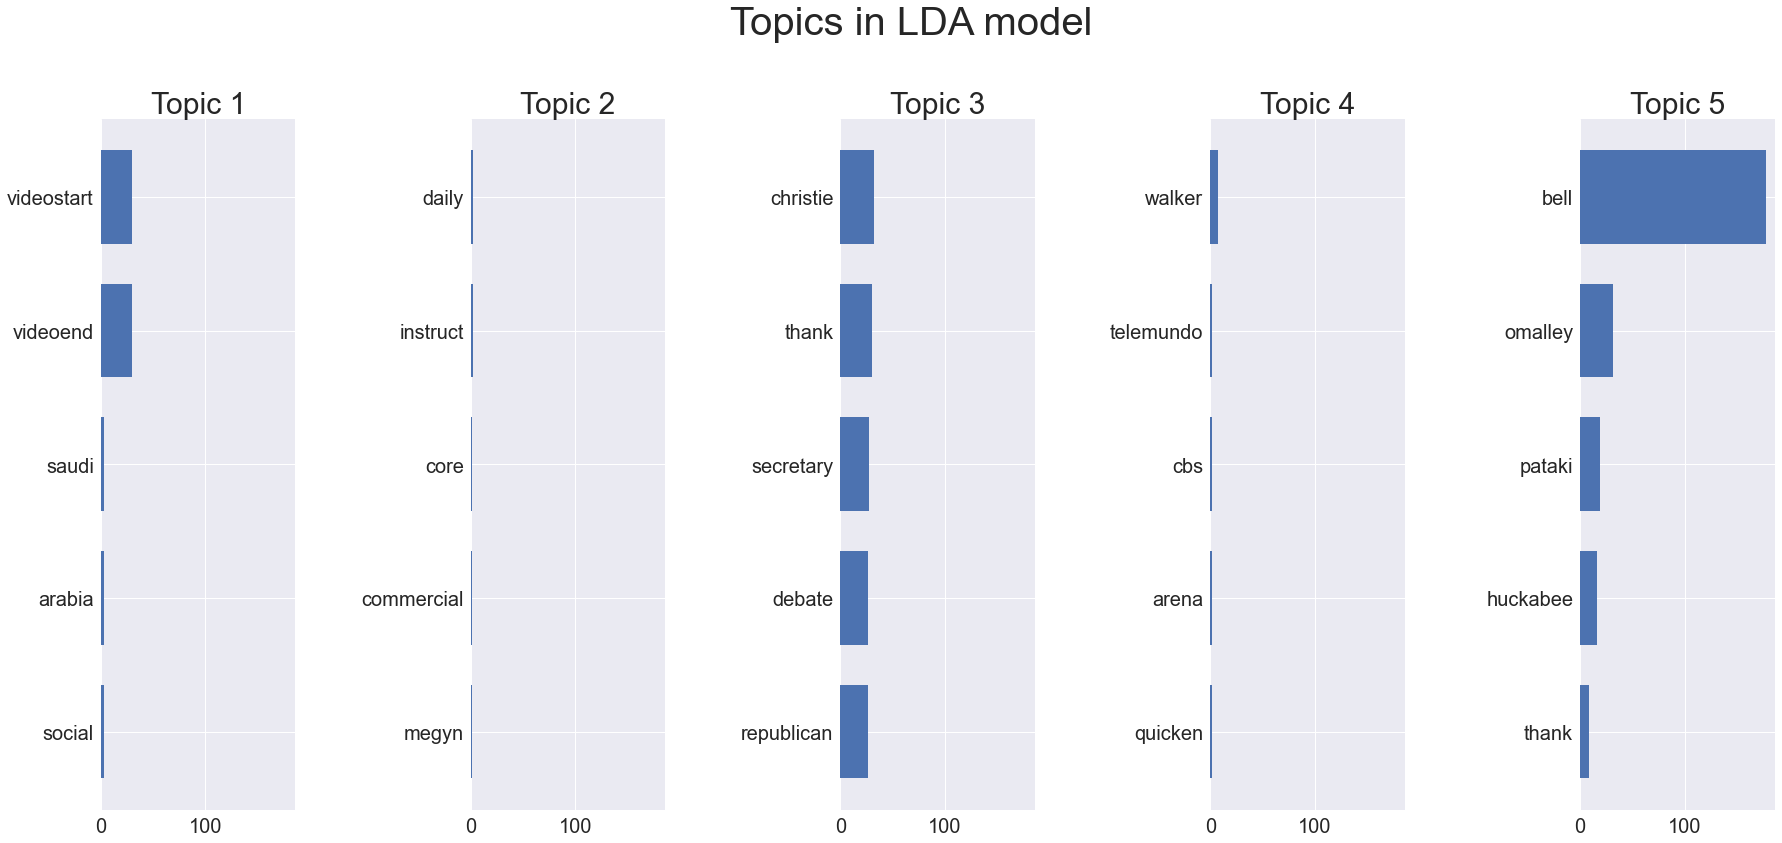

In [274]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 12), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda, tfidf_vectorizer.get_feature_names(), 5, "Topics in LDA model")

### Prevalence of topics over time
Let's now look at how prevalent at topic is respect to the time. We can look at what is the most probable topic for each of the texts.

In [275]:
most_probable_topic = np.argmax(proportions, 1) #calculate the most probable topic
print(list(most_probable_topic[70:110]))

[2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 2]


Here we see, for instance, that 2 and 1 are the most probable topics for texts 70 to 110

Now let's calculate the number of times a text has been classified to a certan topic but aggregated by dates

In [276]:
sorted_unique_months = np.sort(np.unique(debates_csv['Date']))
raw_counts = np.zeros((proportions.shape[1], len(sorted_unique_months)))
for month_idx, month in enumerate(sorted_unique_months):
    for topic_idx in range(proportions.shape[1]):
        indices = np.where(debates_csv['Date'] == month)[0]
        raw_counts[topic_idx, month_idx] = ((most_probable_topic[indices] == topic_idx)).sum()
                                            
total_counts_per_month = raw_counts.sum(axis=0) #add up the months

The "raw counts" has the aggregated counts by date and topic. We can see the total counts per month by summing up each row from the "raw counts"

In [277]:
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})
print("this are the totals per month", total_counts_per_month)

this are the totals per month [ 187  209  118  164  151  73  211  95  149  90  167  79  118  59  101
  125  113  80  66  100  104]


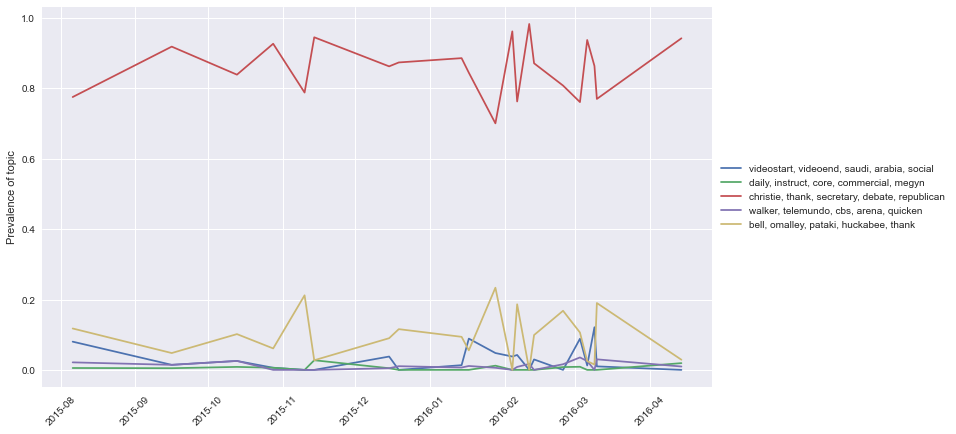

In [278]:
plt.figure(figsize=(12,7))
for topic_idx in range(proportions.shape[1]):
    plt.plot(sorted_unique_months, raw_counts[topic_idx] / total_counts_per_month,
             label=', '.join(alltopics_top_words[topic_idx][:5]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45)
plt.ylabel("Prevalence of topic")
plt.show()

From this plot we can see that the most common topics were 

Topic a: Has words like applause, steeler, rifle, etc.

Topic b: Has words like re, isis, let, don, well

We can also see that there is a prevalence of this words and topics over time

**Trying to find some correlations with Topics**
We can start printing the organzations or nationalities/religious/political groups so that we can find some correlations in terms of why these 5 topics were formed. The words used in these topics might be strongly correlated to organizational entities for instance. Similarly, a political or religious group might be mentioned often in a certain topic 

In [281]:
print(set([y for x in [x.split() for x in debates_csv[most_probable_topic==1]['norp'].to_list()] for y in x]))

{'Democratic'}


In [282]:
print(set([y for x in [x.split() for x in debates_csv[most_probable_topic==0]['norp'].to_list()] for y in x]))

{'Israelis', 'American', 'Democrat', 'Israeli', 'Cuban', 'Muslim', 'Americans'}


For instance and just as an example, we could say that topic 0 which had prevalence has entities related to nationalities while topic 1 with less prevalence has the word "Democratic". Perhaps, we could infer that those speeches that mention nationalities or religion-related words are more popular than those not mentioning them. This is just an example of the possible correlation we could find, but in this case the results are not conclusive.

Now let's look at some of the top **speakers** by topic, which might give us more insights about why the topics are separated

In [285]:
histogram = Counter()
histogram.update(debates_csv[most_probable_topic==2]['Speaker'].to_list())
sorted(histogram.items(), key=lambda x: x[1], reverse=True)[:10]

[('Clinton', 228),
 ('Sanders', 198),
 ('Cruz', 147),
 ('Rubio', 129),
 ('Trump', 114),
 ('Kasich', 84),
 ('Bush', 68),
 ('Christie', 68),
 ('Blitzer', 63),
 ('Tapper', 52)]

In [286]:
histogram = Counter()
histogram.update(debates_csv[most_probable_topic==3]['Speaker'].to_list())
sorted(histogram.items(), key=lambda x: x[1], reverse=True)[:10]

[('Tapper', 4),
 ("O'Malley", 3),
 ('Blitzer', 3),
 ('Kelly', 3),
 ('Sanders', 2),
 ('Hewitt', 2),
 ('Wallace', 2),
 ('Baier', 2),
 ('Raddatz', 2),
 ('Rubio', 2)]

We could infer, for example, that the more popular speakers appear to be located within topic 2. That is most of the words mentioned in topic 2 might be correlated to a certain type of speaker (the most popular ones in this case). While the results are not too useful. We can see that with more pre-processing steps we could arrive to a more granular, better result, which could allow us to make better correlations and perhaps find causations.